In [130]:
# id:1--2--1 

import numpy as np

data = np.loadtxt('week3.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

## i.a

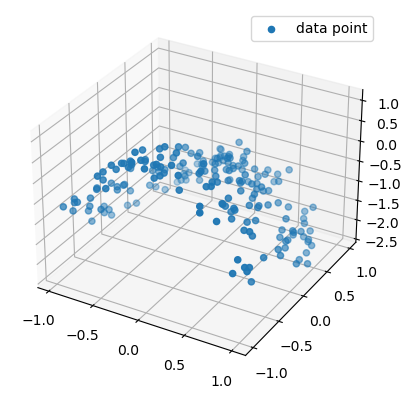

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="data point")
ax.legend(loc='best')

## i.b

In [39]:
from sklearn.model_selection import train_test_split

X = data[:, :2]
Y = data[:, 2]

np.random.seed(333)
# Use the train:test to divide the dataset with a ratio of 2:8
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [59]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Lasso(alpha=alpha))
    ])

def get_coef(model):
    return model.named_steps['reg'].coef_

def get_intercept(model):
    return model.named_steps['reg'].intercept_

In [60]:
c_list = [1, 10, 100, 1000]
model_list = []
mean_list = []
pred_list = []

In [61]:
for c in c_list:
    reg = LassoRegression(5, 1/(2*c))
    model = reg.fit(x_train, y_train)
    pred = reg.predict(x_test)
    mean = mean_squared_error(y_test, y_pred1)
    
    model_list.append(model)
    pred_list.append(pred)
    mean_list.append(mean)

In [62]:
for model in model_list:
    print(get_coef(model))

[ 0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.
 -0. -0. -0.]
[ 0.         -0.         -0.80546865 -1.45330017 -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.        ]
[ 0.         -0.         -1.02462187 -1.99147049 -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.          0.          0.01995108 -0.         -0.         -0.
 -0.         -0.          0.11427861]
[ 0.          0.00662436 -1.12929224 -2.27851731  0.         -0.03659612
  0.         -0.          0.0113824   0.          0.22273474 -0.
  0.11719395  0.01927037  0.07369879  0.         -0.         -0.02745631
 -0.04993251 -0.          0.36570462]


In [64]:
for model in model_list:
    print(get_intercept(model))

-0.6937472416091168
-0.19899433520070592
-0.02364272769882969
0.014012207474357385


## i.c

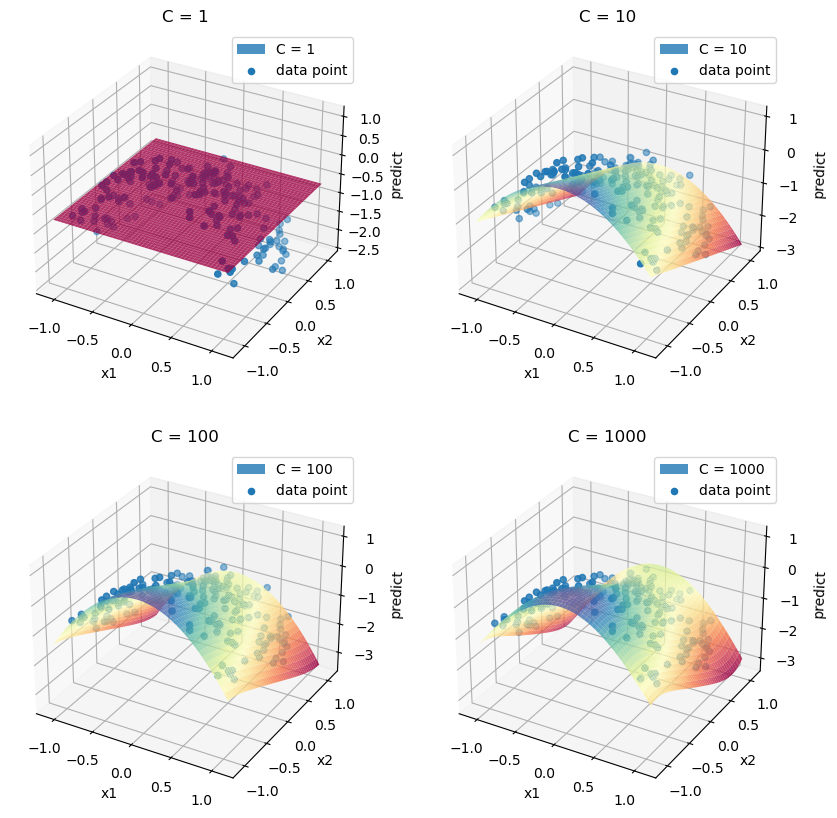

In [112]:
fig = plt.figure(figsize=(10,10))

x1 = np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
x2 = np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1)
X1, X2 = np.meshgrid(x1, x2)

sub = [221, 222, 223, 224]
for i in range(1, len(model_list) + 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('predict')
    
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="data point")
    
    Z = []
    for j in range(len(X1)):
        temp = np.column_stack((X1[j], X2[j]))
        Z.append(model_list[i - 1].predict(temp))
    Z = np.array(Z)
    
    surf = ax.plot_surface(X1, X2, Z, label="C = {}".format(c_list[i - 1]), cmap=plt.cm.Spectral, alpha=0.8)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
    plt.legend()
    plt.title("C = {}".format(c_list[i - 1]))
plt.show()

## i.e

In [104]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Ridge(alpha=alpha))
    ])

c_list = [1, 10, 100, 1000]
ridge_model_list = []
ridge_mean_list = []
ridge_pred_list = []

for c in c_list:
    reg = RidgeRegression(5, 1/(2*c))
    model = reg.fit(x_train, y_train)
    pred = reg.predict(x_test)
    mean = mean_squared_error(y_test, y_pred1)
    
    ridge_model_list.append(model)
    ridge_pred_list.append(pred)
    ridge_mean_list.append(mean)

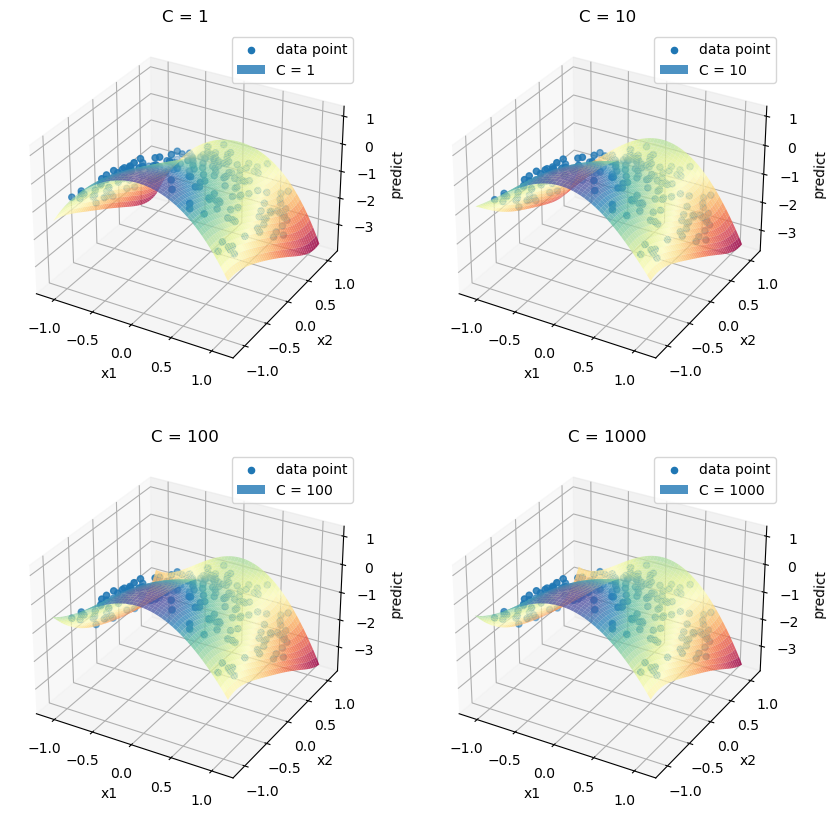

In [113]:
fig = plt.figure(figsize=(10,10))

x1 = np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
x2 = np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1)
X1, X2 = np.meshgrid(x1, x2)

for i in range(1, len(ridge_model_list) + 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('predict')

    ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="data point")
    
    Z = []
    for j in range(len(X1)):
        temp = np.column_stack((X1[j], X2[j]))
        Z.append(ridge_model_list[i - 1].predict(temp))
    Z = np.array(Z)
    
    surf = ax.plot_surface(X1, X2, Z, label="C = {}".format(c_list[i - 1]), cmap=plt.cm.Spectral, alpha=0.8)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
    plt.legend()
    plt.title("C = {}".format(c_list[i - 1]))

plt.show()

## ii.a

In [136]:
X.shape

(199, 2)

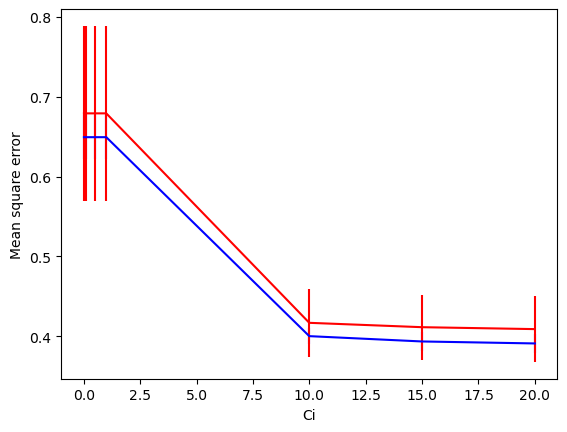

In [161]:
train_mean_error=[]
train_std_error=[]
test_mean_error=[]
test_std_error=[]

Ci_range = [0.01, 0.1, 0.5, 1, 10,15, 20]
# Ci_range = [1, 10, 100, 1000]

for Ci in Ci_range:
    model = Lasso(alpha=1/(2*Ci))

    train_temp=[]
    test_temp=[]
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        train_pred = model.predict(X[train])
        test_pred = model.predict(X[test])
        
        from sklearn.metrics import mean_squared_error
        train_temp.append(mean_squared_error(y[train],train_pred))
        test_temp.append(mean_squared_error(y[test],test_pred))
        
    train_mean_error.append(np.array(train_temp).mean())
    train_std_error.append(np.array(train_temp).std())
    test_mean_error.append(np.array(test_temp).mean())
    test_std_error.append(np.array(test_temp).std())


import matplotlib.pyplot as plt
plt.errorbar(Ci_range,train_mean_error,yerr=train_std_error, c='blue', label='train')
plt.errorbar(Ci_range,test_mean_error,yerr=test_std_error, c='red', label='test')
plt.xlabel('Ci'); plt.ylabel('Mean square error')
# plt.xlim((X.min()-1,X.max()+1))
plt.show()

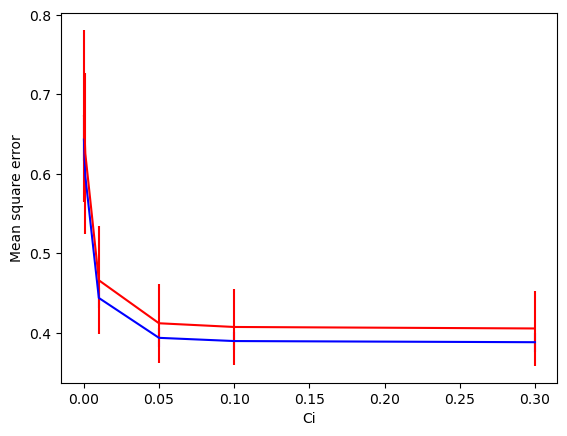

In [162]:
train_mean_error=[]
train_std_error=[]
test_mean_error=[]
test_std_error=[]

Ci_range = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3]

for Ci in Ci_range:
    model = Ridge(alpha=1/(2*Ci))

    train_temp=[]
    test_temp=[]
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        train_pred = model.predict(X[train])
        test_pred = model.predict(X[test])
        
        from sklearn.metrics import mean_squared_error
        train_temp.append(mean_squared_error(y[train],train_pred))
        test_temp.append(mean_squared_error(y[test],test_pred))
        
    train_mean_error.append(np.array(train_temp).mean())
    train_std_error.append(np.array(train_temp).std())
    test_mean_error.append(np.array(test_temp).mean())
    test_std_error.append(np.array(test_temp).std())


import matplotlib.pyplot as plt
plt.errorbar(Ci_range,train_mean_error,yerr=train_std_error, c='blue', label='train')
plt.errorbar(Ci_range,test_mean_error,yerr=test_std_error, c='red', label='test')
plt.xlabel('Ci'); plt.ylabel('Mean square error')
# plt.xlim((X.min()-1,X.max()+1))
plt.show()

In [23]:
lasso_reg_1 = RidgeRegression(5, 1/(2*10))
lasso_model1 = lasso_reg_1.fit(x_train, y_train)
y_pred1 = lasso_reg_1.predict(x_test)

mean_s1 = mean_squared_error(y_test, y_pred1)
print("mean_squared_error:", mean_s1)

print("coef:", get_coef(model1))
print("intercept:", get_intercept(model1))

mean_squared_error: 0.06329723351161905
coef: [ 0.         -0.         -0.80546865 -1.45330017 -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.        ]
intercept: -0.19899433520070592


In [28]:
def get_model(degree, c):
    alpha = 1 / (2 * c)
    reg = LassoRegression(degree, alpha)
    model = reg.fit(x_train, y_train)
    return model


def get_coef_by_c(degree, c_list):
    for c in c_list:
        model = get_model(degree, c)
#         y_pred = reg.predict(x_test)
        print("coef:", get_coef(model))

In [29]:
get_coef_by_c(5, [1, 10, 100, 1000])

coef: [ 0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.
 -0. -0. -0.]
coef: [ 0.         -0.         -0.80546865 -1.45330017 -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.        ]
coef: [ 0.         -0.         -1.02462187 -1.99147049 -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.          0.          0.01995108 -0.         -0.         -0.
 -0.         -0.          0.11427861]
coef: [ 0.          0.00662436 -1.12929224 -2.27851731  0.         -0.03659612
  0.         -0.          0.0113824   0.          0.22273474 -0.
  0.11719395  0.01927037  0.07369879  0.         -0.         -0.02745631
 -0.04993251 -0.          0.36570462]


In [210]:
delta = 1
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
# 计算Z轴数据（高度数据）
Z = (Z1 - Z2) * 2

In [19]:
x_ = []
grid = np.linspace(X.min()-1, X.max()+1)
for i in grid:
    for j in grid:
        x_.append([i, j])
x_ = np.array(x_)

In [56]:
grid.shape

(50,)

In [34]:
x_.shape

(2500, 2)

In [86]:
c_list = [1, 10, 100, 1000]
degree = 5

# for c in c_list:
model = get_model(degree, 10)
pred = model.predict(x_)
ploy = PolynomialFeatures(5)
print(pred.shape)

(2500,)


In [36]:
x1, x2 = np.meshgrid(x_[:, 0], x_[:, 1])
print(x1.shape, x2.shape)

(2500, 2500) (2500, 2500)


In [40]:
x_

array([[-2.        , -2.        ],
       [-2.        , -1.91836735],
       [-2.        , -1.83673469],
       ...,
       [ 2.        ,  1.83673469],
       [ 2.        ,  1.91836735],
       [ 2.        ,  2.        ]])

In [38]:
def function_value(data):
    Z = []
    for i in range(0,len(data[:, 1])):
        function_value = []
        for j in range(0,len(data[:, 0])):
            print(data[0, 1])
#             z = model.predict(data[i, 0], data[j, 1])
#             function_value.append(z)
#         Z.append(function_value)
#     return Z
function_value(x_)

TypeError: predict() takes 2 positional arguments but 3 were given

In [51]:
def f(x, y):
    return x+y

x = np.linspace(0, 10, 5)
y = np.linspace(0, 10, 2)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

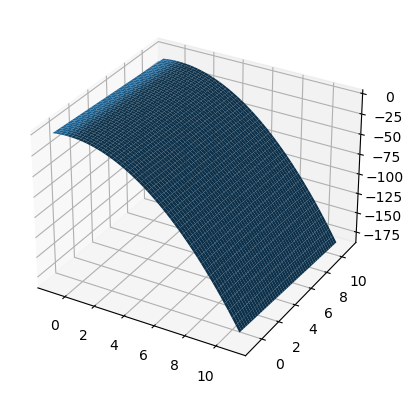

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c = 10
alpha = 1 / (2 * c)
reg = LassoRegression(5, alpha)
model = reg.fit(x_train, y_train)

x1 = np.linspace(X.min()-1, X.max()+1)
x2 = np.linspace(X.min()-1, X.max()+1)
X1, X2 = np.meshgrid(x1, x2)

Z = []
for j in range(len(X1)):
    temp = np.column_stack((X1[j], X2[j]))
    Z.append(model.predict(temp))
Z = np.array(Z)

ax.plot_surface(X1, X2, Z, label="test")
plt.show()

In [57]:
x

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [58]:
y

array([ 0., 10.])

In [52]:
X

array([[ 0. ,  2.5,  5. ,  7.5, 10. ],
       [ 0. ,  2.5,  5. ,  7.5, 10. ]])

In [53]:
Y

array([[ 0.,  0.,  0.,  0.,  0.],
       [10., 10., 10., 10., 10.]])

In [54]:
Z

array([[ 0. ,  2.5,  5. ,  7.5, 10. ],
       [10. , 12.5, 15. , 17.5, 20. ]])

In [72]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Ridge(alpha=alpha))
    ])

In [82]:
ridge_reg = RidgeRegression(5, 1/2*0.00001)
ridge_model = ridge_reg.fit(x_train, y_train)
get_coef(ridge_model)

array([ 0.        , -0.15069117, -1.22204059, -2.54863056,  0.14124569,
       -0.25239648,  0.34052042,  0.12293614,  0.63011136,  0.20480053,
        0.48321862, -0.25329016,  0.29104358, -0.02491365,  0.25759608,
       -0.18333573,  0.10662818, -0.67133142, -0.33352247, -0.33032419,
        0.30490592])

In [81]:
ridge_reg = RidgeRegression(5, 1/2*0.0001)
ridge_model = ridge_reg.fit(x_train, y_train)
get_coef(ridge_model)

array([ 0.        , -0.15057051, -1.22198898, -2.54840113,  0.14112982,
       -0.25232716,  0.34011272,  0.12299735,  0.62980988,  0.20465161,
        0.48298412, -0.2530947 ,  0.29089708, -0.02485022,  0.25755682,
       -0.18301481,  0.10639026, -0.67096222, -0.33339872, -0.33017489,
        0.30497784])

In [79]:
ridge_reg = RidgeRegression(5, 1/2*0.001)
ridge_model = ridge_reg.fit(x_train, y_train)
get_coef(ridge_model)

array([ 0.        , -0.14937476, -1.2214744 , -2.54611466,  0.13997993,
       -0.25163704,  0.33607562,  0.12359779,  0.62681416,  0.20317075,
        0.48064773, -0.25115449,  0.28943982, -0.02422154,  0.25716597,
       -0.17983756,  0.10403228, -0.66729794, -0.33216572, -0.32868867,
        0.3056914 ])

In [78]:
ridge_reg = RidgeRegression(5, 1/2*0.01)
ridge_model = ridge_reg.fit(x_train, y_train)
get_coef(ridge_model)

array([ 0.        , -0.13841748, -1.21647967, -2.52398299,  0.12929431,
       -0.24501431,  0.29935867,  0.12854273,  0.5986356 ,  0.18916414,
        0.45808272, -0.23308213,  0.27558309, -0.01845663,  0.25342136,
       -0.1509873 ,  0.08239858, -0.63321558, -0.3202699 , -0.31446841,
        0.3122912 ])

In [77]:
ridge_reg = RidgeRegression(5, 1/2*0.1)
ridge_model = ridge_reg.fit(x_train, y_train)
get_coef(ridge_model)

array([ 0.        , -0.08187995, -1.17828699, -2.34883808,  0.06765244,
       -0.19543941,  0.12069231,  0.12905674,  0.42236899,  0.10115175,
        0.28212079, -0.12662782,  0.17800472,  0.01113927,  0.22562378,
       -0.01226828, -0.03149365, -0.43483924, -0.23312365, -0.21580231,
        0.34462654])

In [76]:
ridge_reg = RidgeRegression(5, 1/2*1)
ridge_model = ridge_reg.fit(x_train, y_train)
get_coef(ridge_model)

array([ 0.        , -0.03259273, -1.05109863, -1.68043539, -0.01295879,
       -0.02562663,  0.00769356, -0.03576147,  0.12402509, -0.03064388,
       -0.34929724, -0.00204372, -0.10964166,  0.04224613,  0.12817339,
        0.0556989 , -0.10799262, -0.14119563, -0.04370578, -0.02217557,
        0.28840159])

In [73]:
ridge_reg = RidgeRegression(5, 1/2*10)
ridge_model = ridge_reg.fit(x_train, y_train)
get_coef(ridge_model)

array([ 0.00000000e+00, -2.76206825e-02, -7.73307845e-01, -1.00147791e+00,
       -5.53800514e-02,  7.00599849e-02, -2.04929737e-02, -1.14134432e-01,
        3.11583859e-03, -1.66972924e-01, -6.89858512e-01, -7.98813421e-02,
       -2.38755283e-01,  5.18027712e-02,  5.60024041e-02, -8.01588015e-03,
       -3.16100579e-02, -4.49722462e-02,  5.13780198e-04,  1.52053245e-02,
        2.80008251e-02])

In [74]:
ridge_reg = RidgeRegression(5, 1/2*100)
ridge_model = ridge_reg.fit(x_train, y_train)
get_coef(ridge_model)

array([ 0.        , -0.05563546, -0.36647517, -0.36443233, -0.06139949,
        0.02257159, -0.03772055, -0.07150579, -0.02558234, -0.17528233,
       -0.29535559, -0.06365995, -0.1029702 , -0.00171028,  0.01257375,
       -0.02640067, -0.02026969, -0.02124955, -0.02725276, -0.00876947,
       -0.10125675])

In [75]:
ridge_reg = RidgeRegression(5, 1/2*1000)
ridge_model = ridge_reg.fit(x_train, y_train)
get_coef(ridge_model)

array([ 0.        , -0.02042191, -0.07837893, -0.04986811, -0.01096628,
        0.00260786, -0.01320447, -0.02013163, -0.00826735, -0.04283411,
       -0.04047418, -0.01071341, -0.01387672, -0.00136934,  0.00120406,
       -0.00936249, -0.0090914 , -0.00543199, -0.0102355 , -0.00378458,
       -0.02804529])

In [99]:
grid = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(grid, grid)
X.shape

(20, 20)